# Invistico_Airlines Classification

## Methods Used-

 1. Logistic Regression
 2. KNN algorithm
 3. Decision Tree
 4. Support Vector Machine

### Import Libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline


In [2]:
#pip install -U imbalanced-learn --user

# Read Dataset

In [3]:


iv = pd.read_csv(r'C:\Users\ASUS\Desktop\Invistico_Airline.csv')




In [4]:
iv.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
iv.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [6]:
iv.shape

(129880, 23)

In [7]:
iv['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [8]:
iv['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

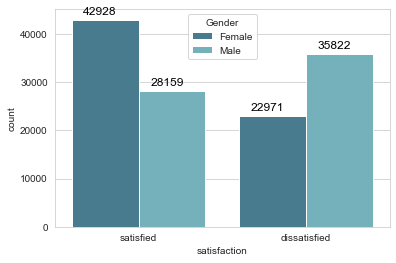

In [9]:
sns.set_style('whitegrid')
fig=sns.countplot(x='satisfaction', hue='Gender', data=iv, palette='GnBu_d')
for i in fig.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+.07, i.get_height()+1000, str(round((i.get_height()), 2)), fontsize=12, color='black',
                rotation=0)

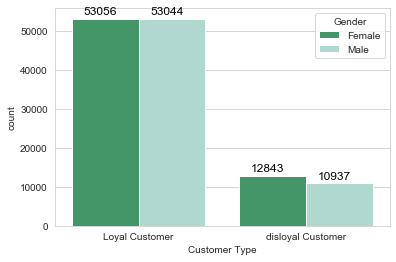

In [10]:
sns.set_style('whitegrid')
fig=sns.countplot(x='Customer Type', hue='Gender', data=iv, palette='BuGn_r')

for i in fig.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+.07, i.get_height()+1000, str(round((i.get_height()), 2)), fontsize=12, color='black',
                rotation=0)

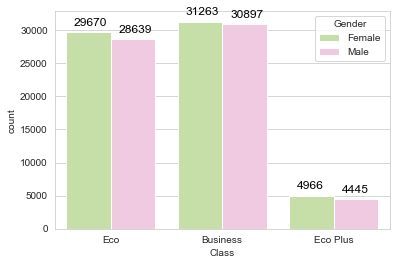

In [11]:
sns.set_style('whitegrid')
fig=sns.countplot(x='Class', hue='Gender', data=iv,palette='PiYG_r')
for i in fig.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+.07, i.get_height()+1000, str(round((i.get_height()), 2)), fontsize=12, color='black',
                rotation=0)

In [12]:
iv.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


###  Detect Null Values

In [13]:
iv.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### Delete Rows with Null Values

In [14]:
iv=iv.dropna()

In [15]:
iv.shape

(129487, 23)

In [16]:
iv = iv.reset_index(drop=True)

In [17]:
iv.head(-5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129477,satisfied,Female,disloyal Customer,55,Personal Travel,Eco,1953,5,2,5,...,5,1,1,1,3,3,4,1,0,0.0
129478,satisfied,Female,disloyal Customer,70,Personal Travel,Eco,1674,5,4,5,...,5,5,3,2,4,5,4,5,54,46.0
129479,satisfied,Female,disloyal Customer,35,Personal Travel,Eco,3287,5,4,5,...,2,2,4,5,4,4,3,2,9,0.0
129480,satisfied,Female,disloyal Customer,69,Personal Travel,Eco,2240,5,4,5,...,4,4,5,4,4,3,4,4,4,0.0


# Dummy Creation

##  Satisfaction-------> 
  
  ### * Satisfied = 1
  ### * Dissatisfied = 0
  
## Gender--------->
 
 ### * Female = 1
 ### * Male = 0
 
## Customer Type------->
 
 ### * Loyal Customer = 1
 ### * Disloyal Customer = 0
 
## Type of Travel--------->
 
 ### * Business Travel = 1
 ### * Personal Travel = 0
 
## Class------------->
 
 ### * Business = reference Class
 ### * Eco
 ### * Eco Plus

In [18]:
iv['satisfaction'].value_counts()

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64

In [19]:
iv['satisfaction'].replace(to_replace=['satisfied','dissatisfied'], value=[1,0],inplace=True)

In [20]:
iv['Gender'].value_counts()

Female    65703
Male      63784
Name: Gender, dtype: int64

In [21]:
iv['Gender'].replace(to_replace=['Female','Male'], value=[1,0],inplace=True)

In [22]:
iv['Customer Type'].value_counts()

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64

In [23]:
iv['Customer Type'].replace(to_replace=['Loyal Customer','disloyal Customer'], value=[1,0],inplace=True)

In [24]:
iv['Type of Travel'].value_counts()

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64

In [25]:
iv['Type of Travel'].replace(to_replace=['Business travel','Personal Travel'], value=[1,0],inplace=True)

In [26]:
Class = pd.get_dummies(iv['Class'],prefix='class',drop_first=True)

In [27]:
Class.head()

,class_Eco,class_Eco Plus
0,1,0
1,0,0
2,1,0
3,1,0
4,1,0


In [28]:
iv = pd.concat([iv, Class], axis=1)

In [29]:
iv=iv.drop(['Class'], axis=1)

# Feature Selection

In [30]:
iv.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'class_Eco',
       'class_Eco Plus'],
      dtype='object')

In [31]:
feature_cols=['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'class_Eco',
       'class_Eco Plus']

X=iv[feature_cols]
y=iv['satisfaction']

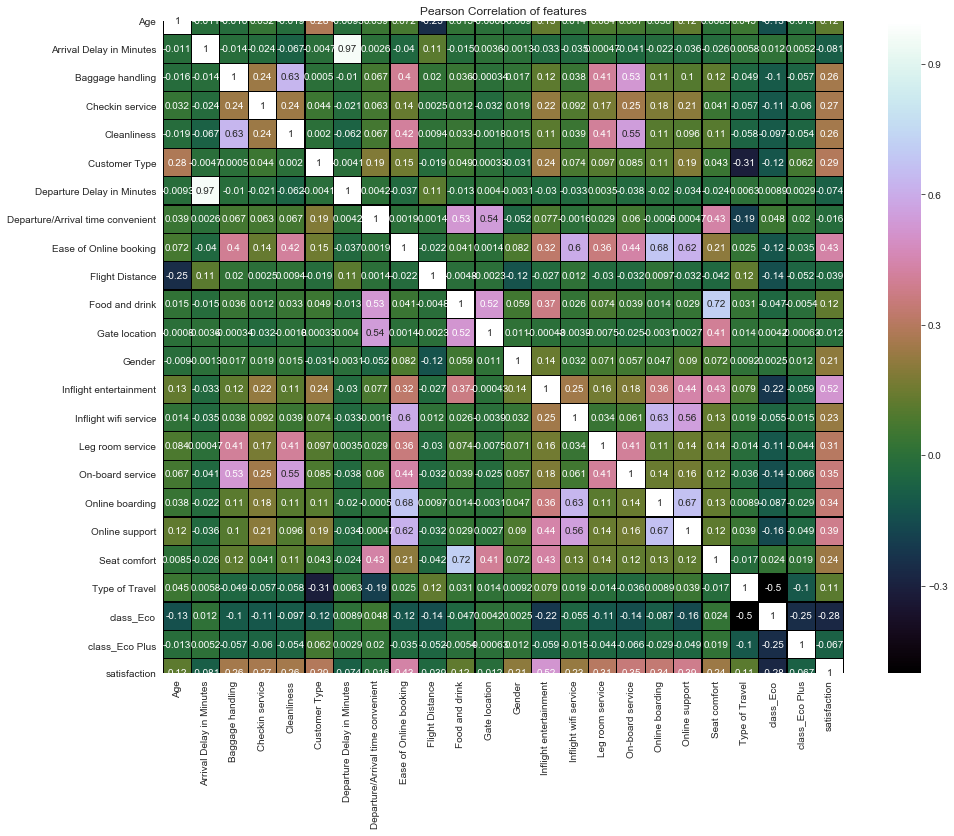

In [32]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in iv.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = iv.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = iv[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

# ***********   Top Factors Analysis

## Methods Used

### Recursive Factor Exclusion , Linear Regression , Ridge , Lasso , Random Forest

In [33]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [34]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [35]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), feature_cols, order=-1)

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [36]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), feature_cols)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), feature_cols)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), feature_cols)

In [37]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,y)
ranks["RF"] = ranking(rf.feature_importances_, feature_cols);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50building tree 14 of 50

building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.0s


building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50building tree 43 of 50

building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50building tree 50 of 50



[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   26.4s finished


In [38]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in feature_cols:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t                %s" % "\t".join(methods))
for name in feature_cols:
    print("%s        \t       %s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	                Lasso	LinReg	RF	RFE	Ridge	Mean
Gender        	       0.0	0.46	0.05	0.86	0.46	0.37
Customer Type        	       0.0	1.0	0.05	1.0	1.0	0.61
Age        	       0.01	0.0	0.06	0.14	0.0	0.04
Type of Travel        	       0.0	0.36	0.06	0.73	0.36	0.3
Flight Distance        	       0.0	0.0	0.1	0.0	0.0	0.02
Seat comfort        	       0.0	0.17	0.45	0.59	0.17	0.28
Departure/Arrival time convenient        	       0.0	0.1	0.06	0.45	0.1	0.14
Food and drink        	       0.0	0.11	0.02	0.55	0.11	0.16
Gate location        	       0.0	0.05	0.04	0.32	0.05	0.09
Inflight wifi service        	       0.0	0.03	0.02	0.18	0.03	0.05
Inflight entertainment        	       1.0	0.34	1.0	0.82	0.34	0.7
Online support        	       0.08	0.05	0.05	0.27	0.05	0.1
Ease of Online booking        	       0.45	0.12	0.14	0.77	0.12	0.32
On-board service        	       0.3	0.14	0.04	0.68	0.14	0.26
Leg room service        	       0.19	0.1	0.04	0.5	0.1	0.19
Baggage handling        	       0.0	0.05	0.05	0.23	0.05	0

In [39]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


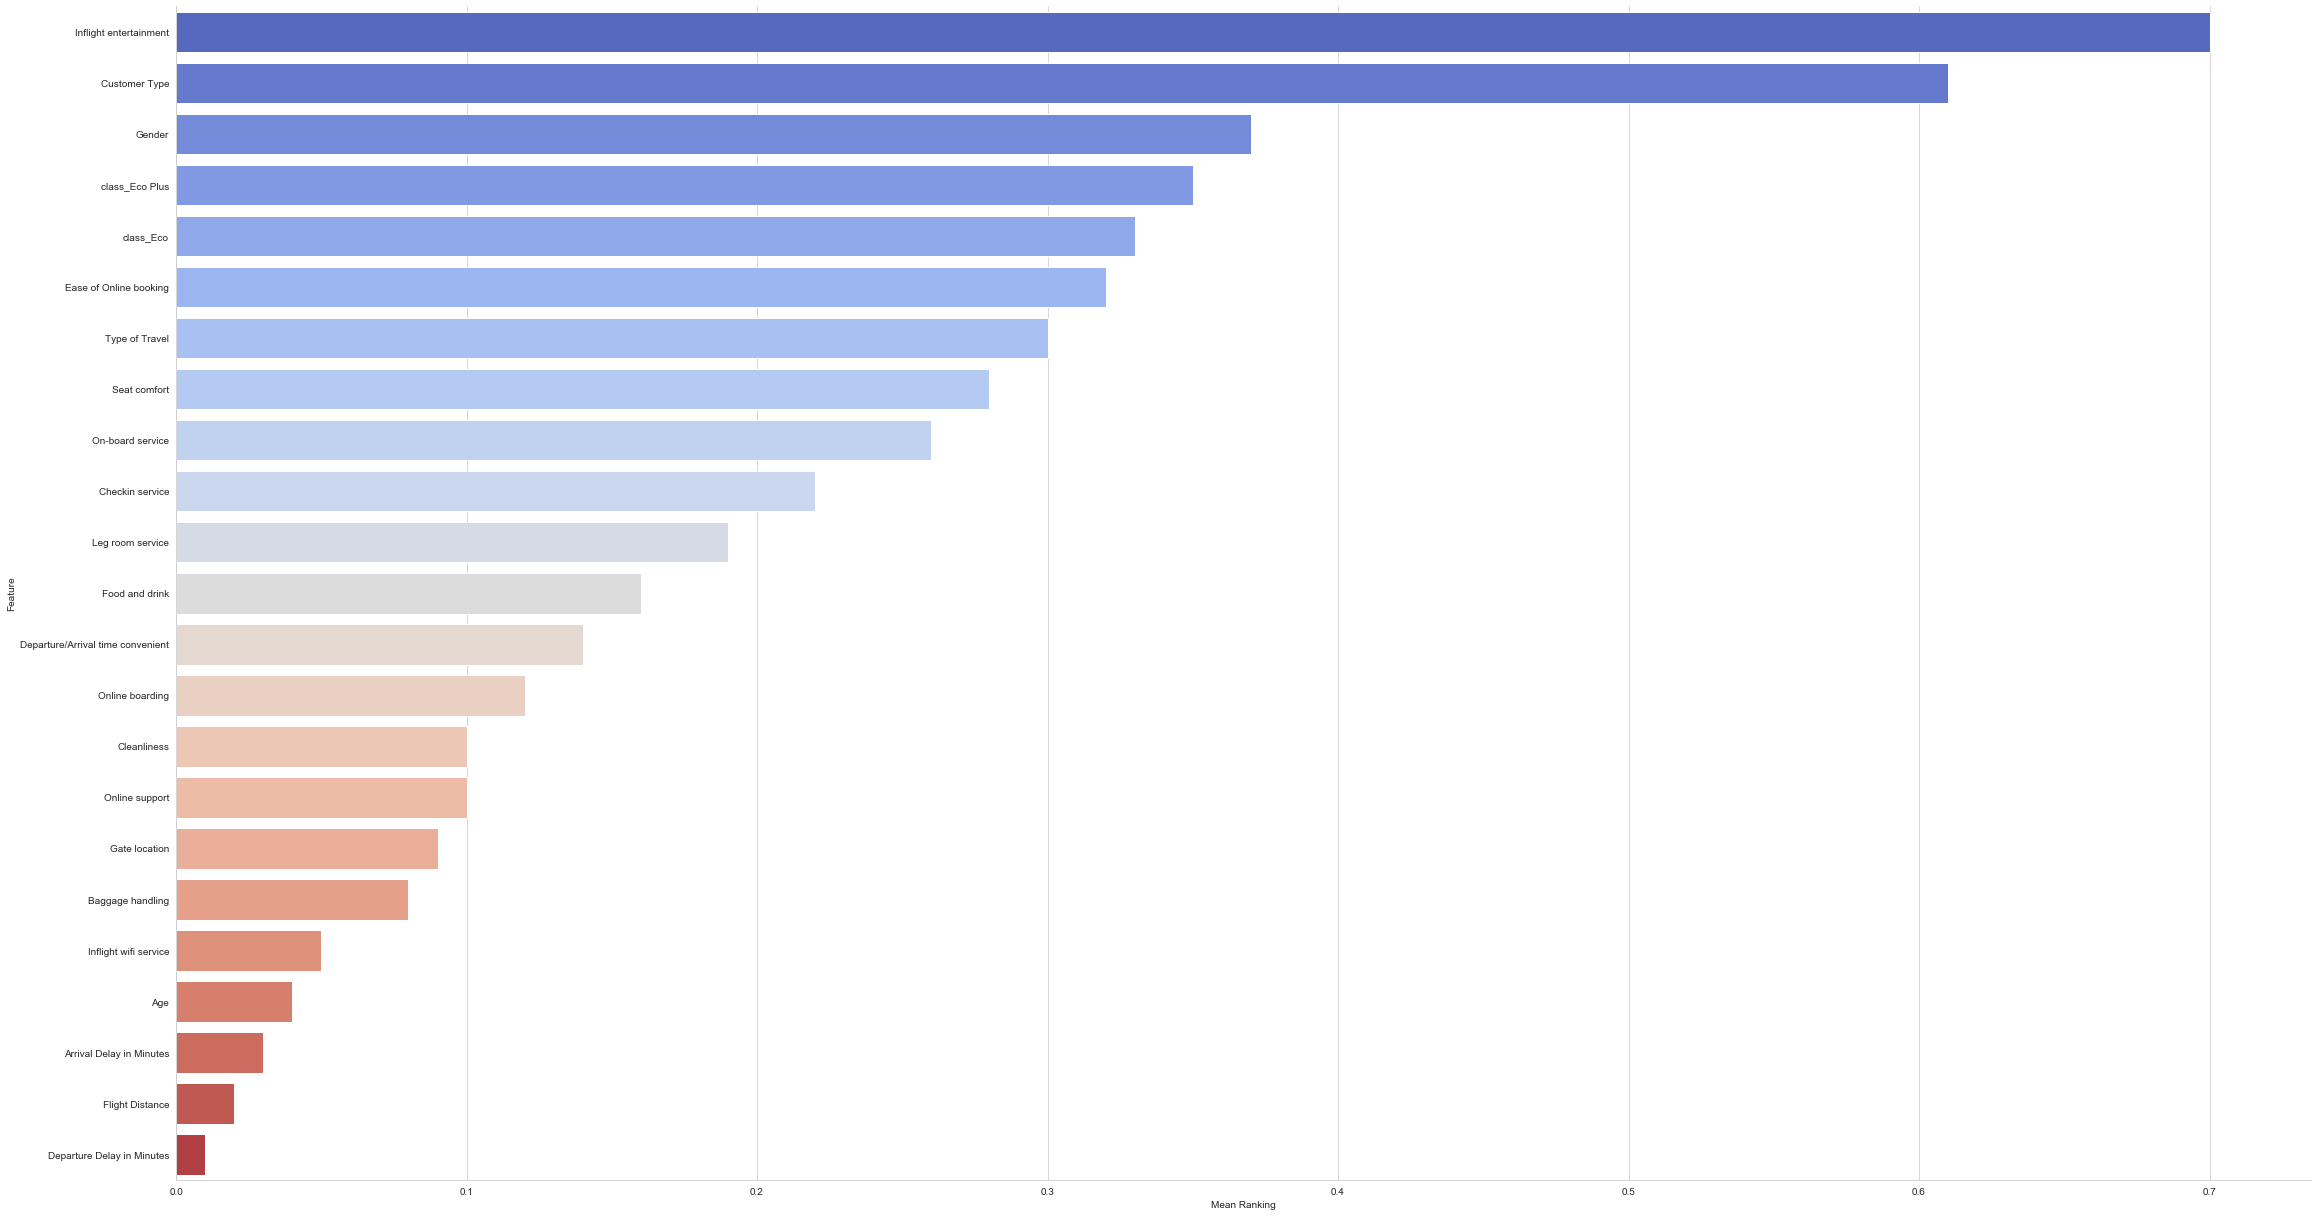

In [40]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=17, aspect=1.9, palette='coolwarm')

## Factors Exclusion

### RFE

In [41]:
X.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'class_Eco', 'class_Eco Plus'],
      dtype='object')

In [44]:
feature_cols=['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'class_Eco',
       'class_Eco Plus']

dep_col=['satisfaction']

X1=iv[feature_cols]
y1=iv[dep_col]

In [45]:
iv_vars=iv.columns.values.tolist()
y=['satisfaction']
X=[i for i in iv_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1, solver='newton-cg',
                         multi_class='multinomial',max_iter=1200)
rfe = RFE(logreg,20)
rfe = rfe.fit(X1, y1.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True]
[1 1 2 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1]


In [46]:
feature_cols=['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'class_Eco',
       'class_Eco Plus']

X=iv[feature_cols]
y=iv['satisfaction']

In [47]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.444192
         Iterations 6
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.355      
Dependent Variable:        satisfaction          AIC:                   115080.2256
Date:                      2020-03-08 10:24      BIC:                   115304.9663
No. Observations:          129487                Log-Likelihood:        -57517.    
Df Model:                  22                    LL-Null:               -89171.    
Df Residuals:              129464                LLR p-value:           0.0000     
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            6.0000                                                  
-----------------------------------------------------------------------------------
                                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------

### Arrival delay , Departure delay , Flight distance is removed from features

In [48]:
feature_cols=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness',
        'class_Eco',
       'class_Eco Plus']

X=iv[feature_cols]
y=iv['satisfaction']

In [49]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.461213
         Iterations 6
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.330      
Dependent Variable:        satisfaction          AIC:                   119480.1435
Date:                      2020-03-08 10:25      BIC:                   119665.7989
No. Observations:          129487                Log-Likelihood:        -59721.    
Df Model:                  18                    LL-Null:               -89171.    
Df Residuals:              129468                LLR p-value:           0.0000     
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            6.0000                                                  
-----------------------------------------------------------------------------------
                                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------

# Logistic R

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

### split x and y into training and testing sets

In [51]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [53]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=1, solver='lbfgs',
                         multi_class='multinomial',max_iter=1200000)

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

In [54]:
print(logreg.coef_)
print(logreg.intercept_)

[[ 0.23619541  0.36389779 -0.04267602  0.16396101  0.19549628 -0.15231677
  -0.15520323  0.07460673 -0.01718462  0.47263663  0.08598539  0.19253204
   0.18646477  0.14167471  0.04371847  0.19232384  0.04880537 -0.17359003
  -0.09624875]]
[0.17352499]


In [55]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12052,  2680],
       [ 2671, 14969]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

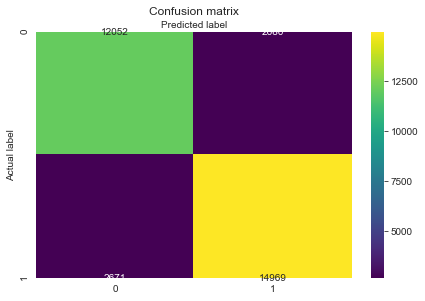

In [56]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     14732
           1       0.85      0.85      0.85     17640

    accuracy                           0.83     32372
   macro avg       0.83      0.83      0.83     32372
weighted avg       0.83      0.83      0.83     32372



## Accuracy & precision 

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8347028296058322
Precision: 0.8481500368292821
Recall: 0.8485827664399093


## ROC Curve

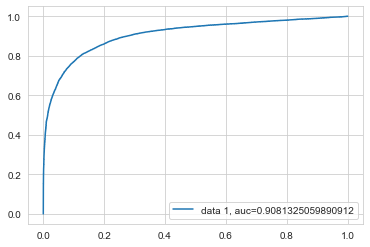

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [60]:
print("Area under curve : ", logit_roc_auc)

Area under curve :  0.9081325059890912


# K Neighbour Classifier

In [61]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [62]:
trainScores={}

In [74]:
from sklearn.neighbors import KNeighborsClassifier

bestScore=0.0
accList=[]

for k in range(3,12):
    
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, x_train, y_train, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 7 | Cross validation Accuracy : 0.9243679815786614


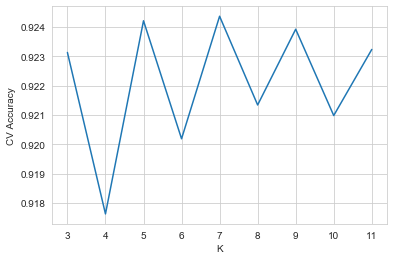

In [75]:
plt.plot(range(3,12),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

In [76]:
clf_knn.fit(x_train,y_train)
y_pred=best_clf.predict(x_train)

In [77]:
trainScores['KNN-jaccard']=jaccard_score(y_train, y_pred)
trainScores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')

In [78]:
trainScores

{'SVM-jaccard': 0.7370052533690084,
 'SVM-f1-score': 0.8340138822294998,
 'LogReg-jaccard': 0.7366851854868929,
 'LogReg-f1-score': 0.8335598291866103,
 'LogReg-logLoss': 0.3902171722607835,
 'KNN-jaccard': 0.8994998550304436,
 'KNN-f1-score': 0.9429704985724753}

# Decision Tree

In [79]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(x_train, y_train)

y_pred=clf_tree.predict(x_train)

In [80]:
trainScores['Tree-jaccard']=jaccard_score(y_train, y_pred)
trainScores['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted')

In [81]:
trainScores

{'SVM-jaccard': 0.7370052533690084,
 'SVM-f1-score': 0.8340138822294998,
 'LogReg-jaccard': 0.7366851854868929,
 'LogReg-f1-score': 0.8335598291866103,
 'LogReg-logLoss': 0.3902171722607835,
 'KNN-jaccard': 0.8994998550304436,
 'KNN-f1-score': 0.9429704985724753,
 'Tree-jaccard': 0.9998497455064516,
 'Tree-f1-score': 0.9999176239314149}

##  *******   Decision tree graph (Use if needed, heavy lag)  ***************

!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                     feature_names=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'class_Eco', 'class_Eco Plus'],  
                     class_names='satisfaction',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"16,16!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph

# Support vector Machine (SVM)

In [63]:
y_train=y_train.astype(float)

In [64]:
from sklearn import svm

clf_svm = svm.LinearSVC(random_state=7,max_iter=120000)
clf_svm.fit(x_train, y_train)  

y_pred=clf_svm.predict(x_train)

In [65]:
trainScores['SVM-jaccard']=jaccard_score(y_train, y_pred)
trainScores['SVM-f1-score']=f1_score(y_train, y_pred, average='weighted')

In [66]:
trainScores

{'SVM-jaccard': 0.7370052533690084, 'SVM-f1-score': 0.8340138822294998}

# LogReg 2

In [67]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=1, solver='newton-cg',
                         multi_class='multinomial')
clf_log.fit(x_train, y_train)

y_pred=clf_log.predict(x_train)
y_proba=clf_log.predict_proba(x_train)

In [68]:
trainScores['LogReg-jaccard']=jaccard_score(y_train, y_pred)
trainScores['LogReg-f1-score']=f1_score(y_train, y_pred, average='weighted')  
trainScores['LogReg-logLoss']=log_loss(y_train, y_proba)

In [69]:
trainScores

{'SVM-jaccard': 0.7370052533690084,
 'SVM-f1-score': 0.8340138822294998,
 'LogReg-jaccard': 0.7366851854868929,
 'LogReg-f1-score': 0.8335598291866103,
 'LogReg-logLoss': 0.3902171722607835}

# Test Scores

In [70]:
testScores={}

### Knn test

In [82]:
knn_pred=clf_knn.predict(x_test)
testScores['KNN-jaccard']=jaccard_score(y_test, knn_pred)
testScores['KNN-f1-score']=f1_score(y_test, knn_pred, average='weighted')

### Decision Tree Test

In [83]:
tree_pred=clf_tree.predict(x_test)
testScores['Tree-jaccard']=jaccard_score(y_test, tree_pred)
testScores['Tree-f1-score']=f1_score(y_test, tree_pred, average='weighted')

### SVM test

In [84]:
svm_pred=clf_svm.predict(x_test)
testScores['SVM-jaccard']=jaccard_score(y_test, svm_pred)
testScores['SVM-f1-score']=f1_score(y_test, svm_pred, average='weighted')

### LogReg Test

In [85]:
log_pred=clf_log.predict(x_test)
proba=clf_log.predict_proba(x_test)
testScores['LogReg-jaccard']=jaccard_score(y_test, log_pred)
testScores['LogReg-f1-score']=f1_score(y_test, log_pred, average='weighted')  
testScores['LogReg-logLoss']=log_loss(y_test, proba)

In [86]:
testScores

{'SVM-jaccard': 0.7370755507367799,
 'SVM-f1-score': 0.8352121228205367,
 'LogReg-jaccard': 0.7366633858267716,
 'LogReg-f1-score': 0.8346986547067784,
 'LogReg-logLoss': 0.38730160621027276,
 'KNN-jaccard': 0.8721535458685752,
 'KNN-f1-score': 0.9272722744156864,
 'Tree-jaccard': 0.892742281303602,
 'Tree-f1-score': 0.9381819036875686}

# Test Scores Comparison

In [87]:
Jaccard = [0.8721535458685752,0.892742281303602,0.7370755507367799,0.7366633858267716]
F1_score = [0.9272722744156864,0.9381819036875686,0.8352121228205367,0.8346986547067784]
LogLoss = ['NA','NA','NA',0.38730160621027276]

    
df = {'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'], \
     'Jaccard': Jaccard, 'F1-score': F1_score, 'LogLoss': LogLoss}

Report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
Report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.872154,0.927272,NA
1,Decision Tree,0.892742,0.938182,NA
2,SVM,0.737076,0.835212,NA
3,LogisticRegression,0.736663,0.834699,0.387302
